# Face Detector
This notebook explains the different methods of the Face Detection Module. \
It is built on top of mediapipe's BlazeFace.
## Load Test Images

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
path = 'test_imgs'
os.listdir(path)
img_paths = [os.path.join(path, f) for f in os.listdir(path)]

imgs = []
for f in img_paths:
    imgs.append(cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB))
timg = imgs[-2]

## Face Detection
- The `FaceDetector()` Object has the following methods:
1. `detect_face(image)`: detects face in image and returns:
    - Outputs:
        - bounding box coordinates (x,y,w,h)
        - 6 keypoints (each with (x,`))
        - returns `None, None` if no face is found
<br>
<br>
2. `pad_crop_detection(image, bbox, keypoints=None, x_ratio=(.4,.4), y_ratio=(.55,.25))`: Extend the bounding box to be square and contain forehead, neck and ears.
    - Inputs:
        - bbox, keypoints (optional) from `detect_face()`
        - x_ratio: relative amount of padding on left and right side
        - y_ratio: relative amount of padding on upper and lower side (sum should be same as sum of x_ratio)
    - Outputs:
        - Cropped image
        - Adjusted keypoints (in cropped image)
        - padded bbounding box coordinates (relative to original image)
    - The Values for x_ratio and y_ratio were chosen based on the image below (from datasets used in **APDrawGAN**)
<br> <br>
3. `detect_face_and_crop(img)`: Combination of 1,2
<br> <br>
4. `draw_detection(img, bbox, kps, plot=True)`: returns an image with a detection drawn on it.Plots using matplotlib if `plot=True`
<br> <br>
5. `detect_face_and_draw()`: Combination of 3. + 4.

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


(array([114, 153, 285, 285]), (512, 512, 3))

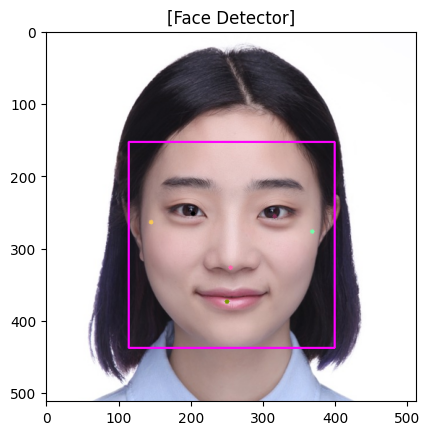

In [3]:
from face_detector import FaceDetector

fd = FaceDetector()
plt.imshow(timg)
out, bbox, kps = fd.detect_face_and_draw(timg)
bbox, timg.shape

## Examples
#### Detect Faces and Draw

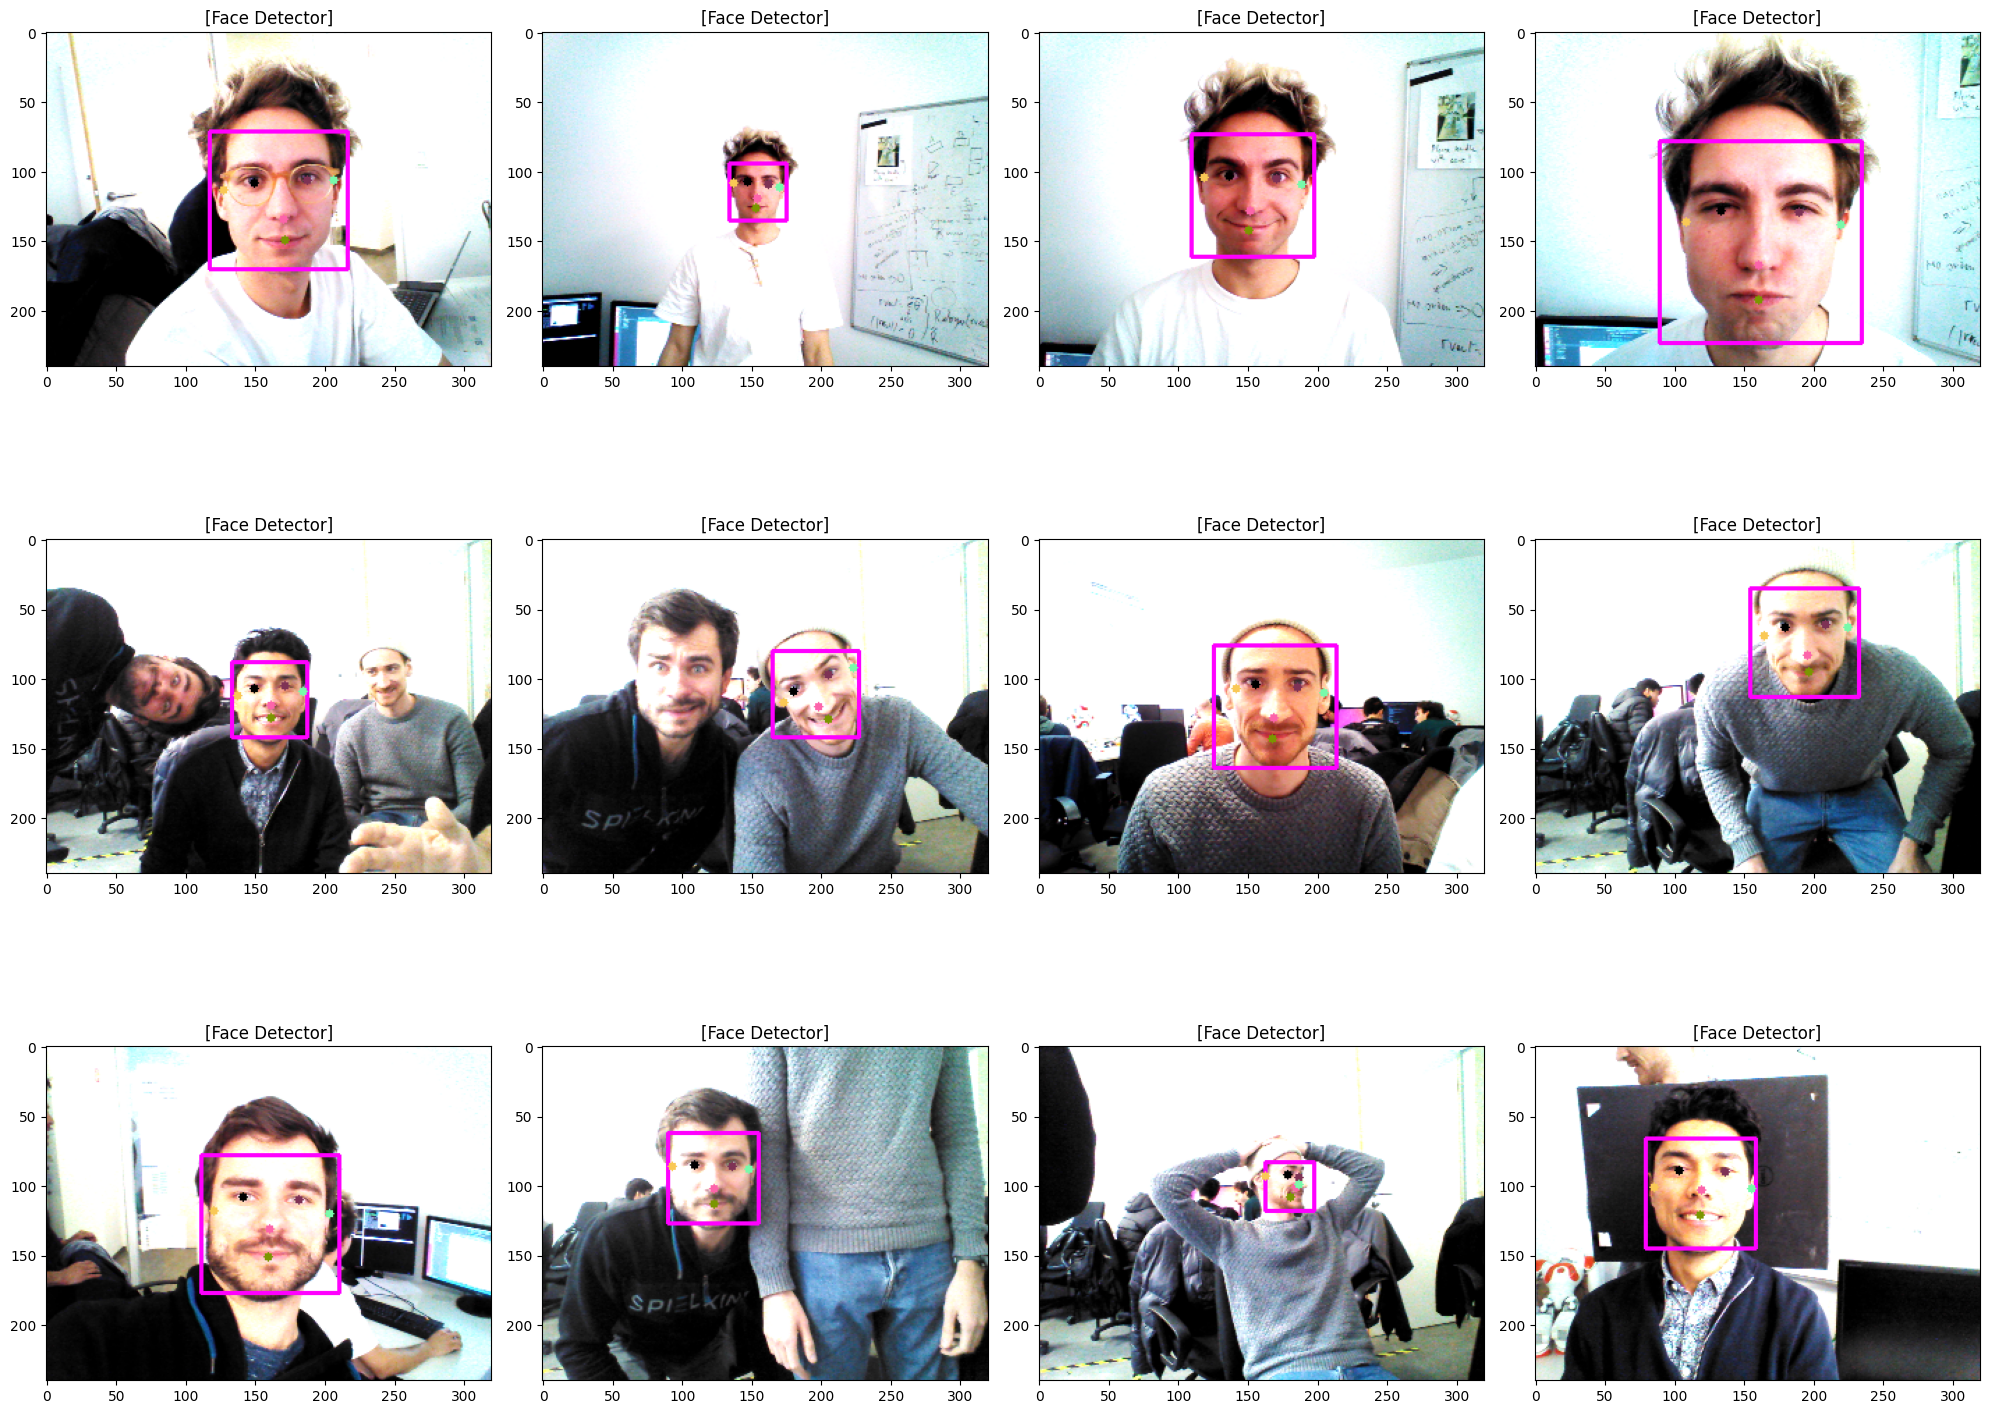

In [4]:
plt.figure(figsize=(20,16))
for num, img in enumerate(imgs[:-2]):
    plt.subplot(3,4,num+1)
    fd = FaceDetector()
    #bbox, kps = fd.detect_face(img)
    fd.detect_face_and_draw(img);
plt.tight_layout()

#### Detect and Pad-Crop Faces

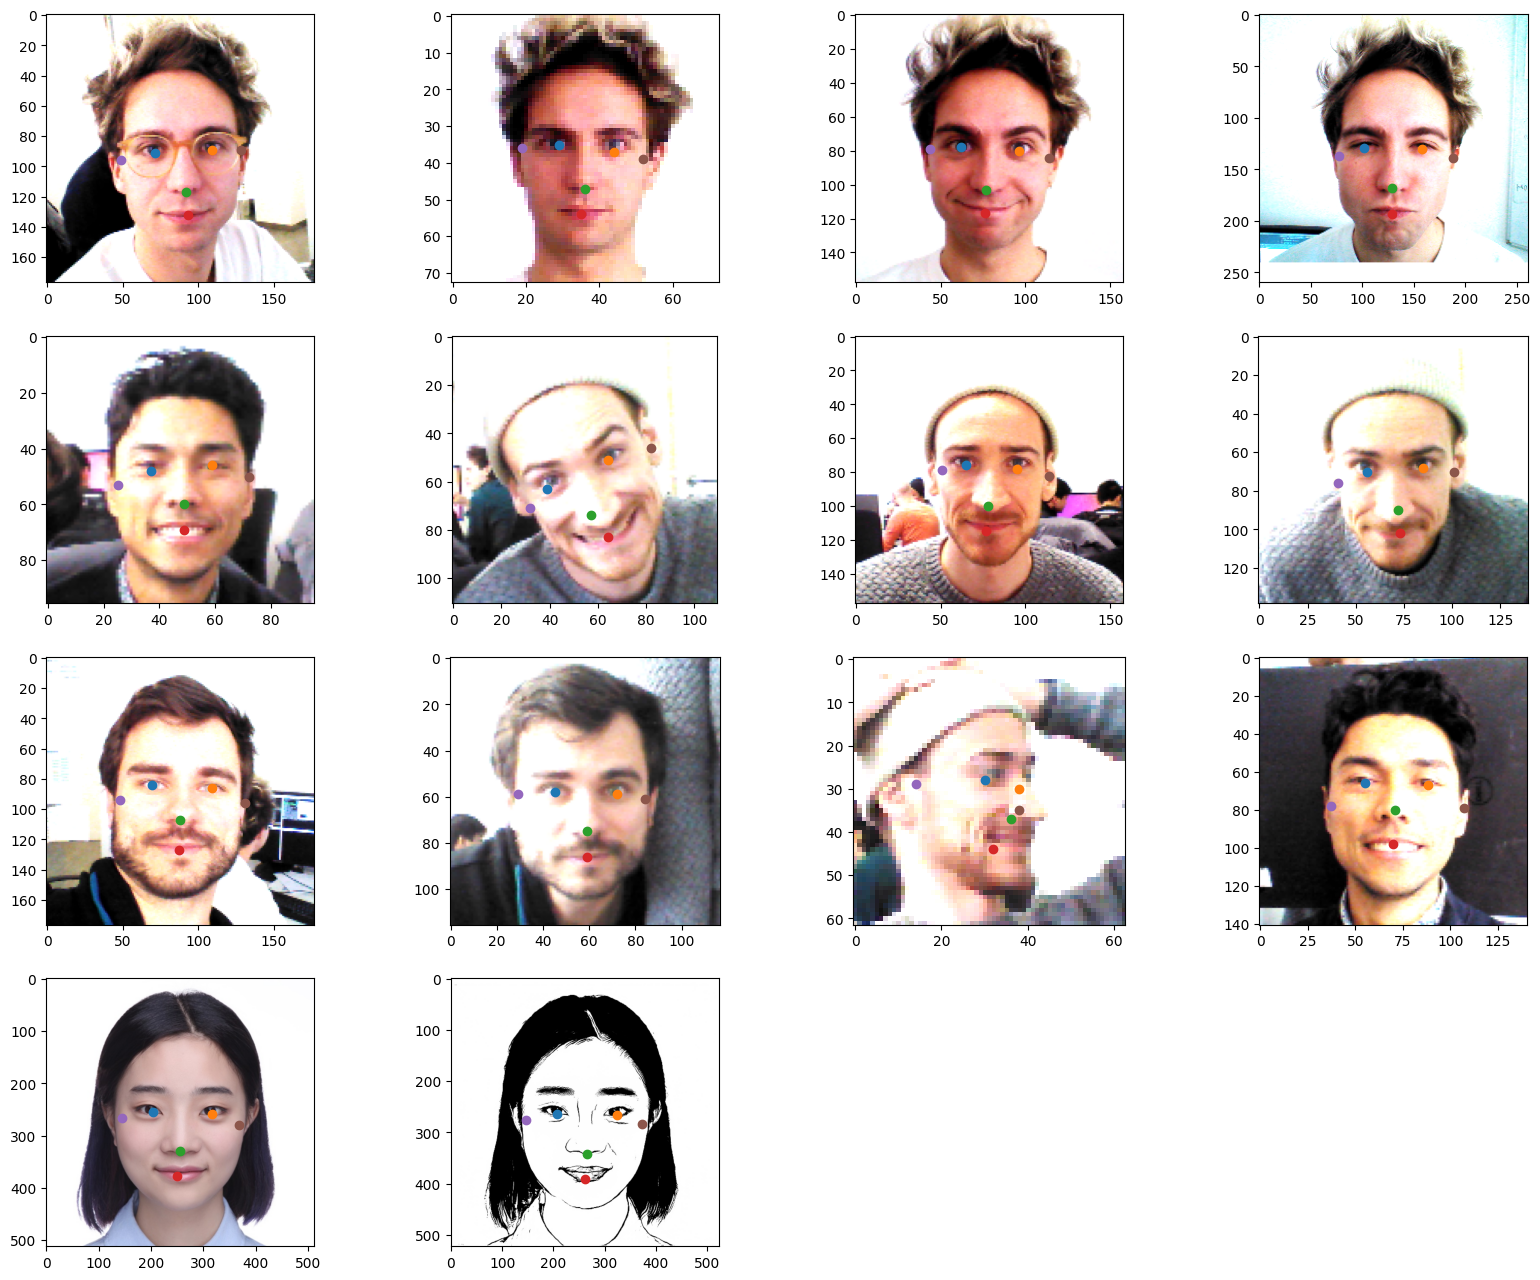

In [7]:
plt.figure(figsize=(20,16))
for num,img in enumerate(imgs):
    bbox, kps = fd.detect_face(img)
    img_crop, kps, bbox_pad = fd.pad_crop_detection(img, bbox, kps)
    
    plt.subplot(4,4,num+1)
    plt.imshow(img_crop)
    for kp in kps:
        plt.scatter(kp[0],kp[1])